## Dataset Overview: London Bike Sharing

This dataset contains hourly records of bike-sharing activity in London. It includes various weather and calendar-related features that can influence the number of bikes rented.

- **timestamp**: Date and time of the observation (hourly frequency).
- **cnt**: Total count of bike rentals during that hour. *(Target variable for prediction)*
- **t1**: Real temperature in °C.
- **t2**: "Feels like" temperature in °C.
- **hum**: Humidity percentage.
- **wind_speed**: Wind speed in km/h.
- **weather_code**: Encoded weather condition:
  - `1.0`: Clear
  - `2.0`: Scattered clouds
  - `3.0`: Broken clouds
  - `4.0`: Cloudy
  - `7.0`: Rain
  - `10.0`: Rain with thunderstorm
  - `26.0`: Snowfall
  - `94.0`: Freezing fog
- **is_holiday**: Whether the day is a public holiday (1 = Yes, 0 = No).
- **is_weekend**: Whether the day is a weekend (1 = Yes, 0 = No).
- **season**: Season of the year (1 = Spring, 2 = Summer, 3 = Autumn, 4 = Winter).

## Exploring the London Bike Sharing Dataset

In this section, you will perform several exploratory data analysis (EDA) tasks to better understand the dataset:

- Load the dataset and parse the timestamp column appropriately.
- Preview the dataset using a method to display the first few rows.
- Check for missing values across all columns.
- Inspect the data types and structure of the dataset.
- Generate summary statistics for the numerical features.
- Explore the distribution of the `weather_code` column.
- Create pairwise visualizations of selected numerical features (`cnt`, `t1`, `t2`, `hum`, `wind_speed`) to identify relationships.

In [54]:
# If you see lots of warnings and it is annoying, uncomment the following lines and run!

# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


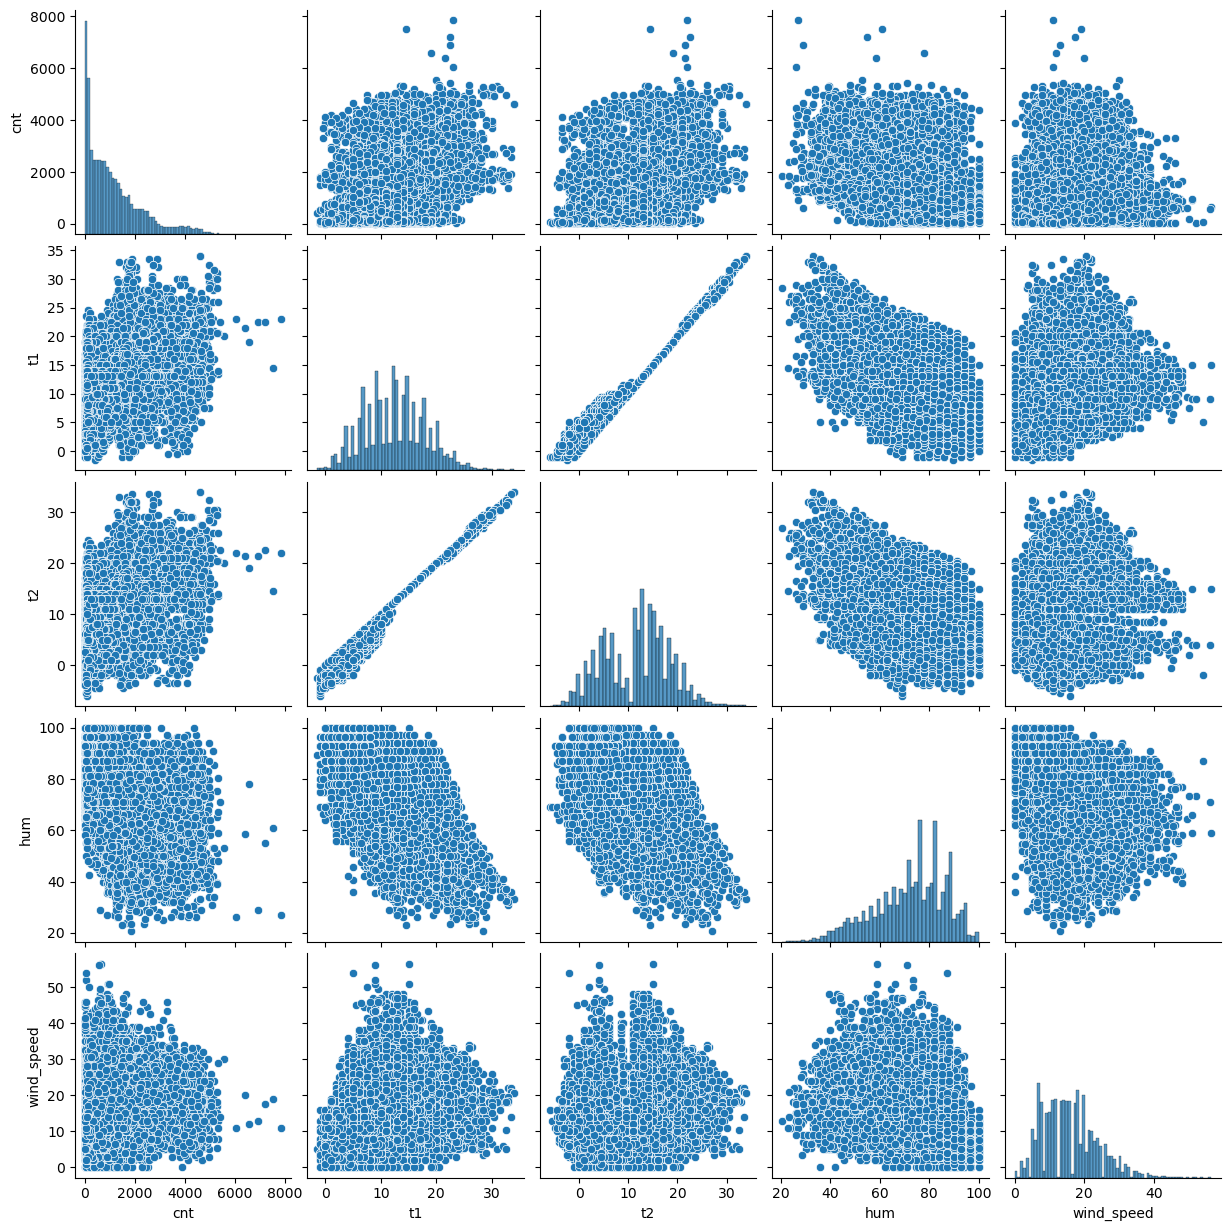

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

df_london = pd.read_csv('C:\\MDA\\2025\\Term_1\\Python for data Analysis (CPSC 610-2)\\Week_8\\london_merged.csv')
df_london['timestamp'] = pd.to_datetime(df_london['timestamp'])
df_london.info()
df_london.head()    

sns.pairplot(df_london, vars=['cnt', 't1', 't2', 'hum', 'wind_speed'])

In [2]:
df_london.describe().round(4)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.0000,17414.0000,17414.0000,17414.0000,17414.0000,17414.0000,17414.0000,17414.0000,17414.0000
mean,2016-01-03 22:31:00.571953664,1143.1016,12.4681,11.5208,72.3250,15.9131,2.7228,0.0221,0.2854,1.4921
min,2015-01-04 00:00:00,0.0000,-1.5000,-6.0000,20.5000,0.0000,1.0000,0.0000,0.0000,0.0000
25%,2015-07-04 20:15:00,257.0000,8.0000,6.0000,63.0000,10.0000,1.0000,0.0000,0.0000,0.0000
50%,2016-01-03 15:30:00,844.0000,12.5000,12.5000,74.5000,15.0000,2.0000,0.0000,0.0000,1.0000
75%,2016-07-04 15:45:00,1671.7500,16.0000,16.0000,83.0000,20.5000,3.0000,0.0000,1.0000,2.0000
max,2017-01-03 23:00:00,7860.0000,34.0000,34.0000,100.0000,56.5000,26.0000,1.0000,1.0000,3.0000
std,NaN,1085.1081,5.5718,6.6151,14.3132,7.8946,2.3412,0.1469,0.4516,1.1189


In [3]:
df_london.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df_london['weather_code'].value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

### Correlation Analysis

It's helpful to look at the numerical values of feature correlations.

- Compute the correlation matrix.
- Check how each feature correlates with the target `cnt`.

This helps you quickly see which features are most relevant.

In [5]:
corr_matrix = df_london.corr()
corr_matrix['cnt'].sort_values(ascending=False).round(4)

cnt             1.0000
t1              0.3888
t2              0.3690
wind_speed      0.1163
timestamp       0.0400
is_holiday     -0.0517
is_weekend     -0.0965
season         -0.1162
weather_code   -0.1666
hum            -0.4629
Name: cnt, dtype: float64

In [6]:
# sorted by abs values
corr_matrix['cnt'].abs().sort_values(ascending=False).round(4)

cnt             1.0000
hum             0.4629
t1              0.3888
t2              0.3690
weather_code    0.1666
wind_speed      0.1163
season          0.1162
is_weekend      0.0965
is_holiday      0.0517
timestamp       0.0400
Name: cnt, dtype: float64

### Train-Test Split

To build and evaluate a machine learning model, you'll need to split the data into features and target:

- Separate the target variable `cnt` from the rest of the features.
- Drop any columns that should not be used for prediction (e.g., `timestamp`).

Since this is time-series data, **do not shuffle** when splitting the dataset.  
Use a time-aware split so the model is trained on past data and tested on future data.

**Note:** There is also a concept called **TimeSeriesSplit**, which performs multiple time-respecting train-test splits.  
You are encouraged to explore and try this method at home as a follow-up exercise.

In [7]:
# Split the data into features and target
X = df_london.drop(columns=['cnt', 'timestamp'], axis=1)
y = df_london['cnt']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13931, 8), (3483, 8), (13931,), (3483,))

### Training a Linear Regression Model

Now it's time to train a simple linear regression model:

- Initialize the model.
- Fit it on the training data.
- Use the trained model to make predictions on the test set.

This gives a baseline to evaluate how well the features can predict bike rental counts.

In [8]:
# train a linear regression model with regular train-test split (no stratification)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Print the model values
print("Predictions:", y_pred)


Predictions: [ 925.18669714  456.66550009 1234.75324574 ...  592.54279043  575.06184124
  310.41041674]


### Previewing Predictions

Before evaluating the model's performance, it's useful to take a quick look at a few predicted values:

- Compare the model’s predictions with the actual values from the test set.
- This gives an initial sense of how close or far off the predictions are.

You can print the first few predicted and actual values side by side to get a quick feel for model output.

In [9]:
print('Actual Y values:', y_test.values[:5].round(2))
print('Predicted Y values:', y_pred[:5].round(2))


Actual Y values: [  66 1749  172 2866 1550]
Predicted Y values: [ 925.19  456.67 1234.75 1796.41  911.24]


### Model Evaluation

After making predictions, evaluate the model's performance using standard regression metrics:

- **RMSE (Root Mean Squared Error)**: Measures the average magnitude of prediction errors. Lower is better.
- **R² Score**: Indicates how well the model explains the variability of the target. Closer to 1 means better fit.

Print these metrics to understand how well the linear regression model performs using the raw features (with no scaling or encoding).

In [10]:
# evaluate model performance using RMSE and R^2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

# Calculate R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", round(r2, 2))


Root Mean Squared Error (RMSE): 947.63
R^2 Score: 0.25


#### Not very good. Let's improve it

### Feature Engineering: Time-Based Features

To improve model performance, we can extract additional features from the `timestamp` column:

- **hour**: The hour of the day (0–23)
- **dayofweek**: The day of the week (0 = Monday, 6 = Sunday)
- **month**: The month of the year (1–12)
- **year**: The year of the observation

These time-based features can help the model capture patterns related to daily, weekly, or seasonal trends in bike rentals.

In [11]:
df_london['hour'] = df_london['timestamp'].dt.hour
df_london['dayofweek'] = df_london['timestamp'].dt.dayofweek
df_london['month'] = df_london['timestamp'].dt.month
df_london['year'] = df_london['timestamp'].dt.year

In [12]:
# corr_matrix sorted by abs values
corr_matrix = df_london.corr()
corr_matrix['cnt'].abs().sort_values(ascending=False).round(4)


cnt             1.0000
hum             0.4629
t1              0.3888
t2              0.3690
hour            0.3244
weather_code    0.1666
wind_speed      0.1163
season          0.1162
is_weekend      0.0965
dayofweek       0.0687
month           0.0638
is_holiday      0.0517
timestamp       0.0400
year            0.0100
Name: cnt, dtype: float64

In [13]:
df_london.describe()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,dayofweek,month,year
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,11.513265,2.99265,6.514643,2015.507810
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2015.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,6.000000,1.00000,4.000000,2015.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,12.000000,3.00000,7.000000,2016.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,18.000000,5.00000,10.000000,2016.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,23.000000,6.00000,12.000000,2017.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,6.915893,2.00406,3.452509,0.508157


### A side note: Box-plot of Hour (Check for Outliers!!)

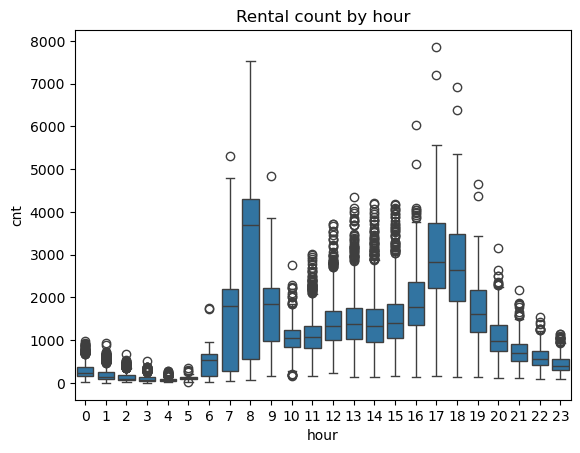

In [14]:
sns.boxplot(x='hour', y='cnt', data=df_london)
plt.title('Rental count by hour')
plt.show()

**Note on Outliers**

You may notice many outliers in the boxplot above — especially for certain hours with very high rental counts.

While outliers can sometimes be **errors** or **noise**, that's not always the case.

In this dataset, these high values likely represent **real events**, like rush hour surges — and they contain useful information.

**Not all outliers should be removed.** Always think about **what the outlier represents** in the context of your data before deciding to drop it.

### Get back to work: Re-run the Model with Time-Based Features

Now that we’ve added new time-based features (`hour`, `dayofweek`, `month`, `year`), let’s see if they help improve the model.

Copy the relevant parts of your previous code below to:

- Prepare the features (`X`) and target (`y`) — now using the updated DataFrame.
- Perform the time-aware train-test split.
- Train the linear regression model.
- Make predictions and evaluate performance.

**Note:** A cleaner approach would be to wrap the model training and evaluation steps into a reusable function. That way, you could easily test different versions of the feature set and compare results.  
But for now, we’ll keep it simple and proceed without that abstraction.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features and target
X = df_london.drop(columns=['cnt', 'timestamp'], axis=1)
y = df_london['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Print the model values
print('Actual Y values:', y_test.values[:5].round(2))
print('Predicted Y values:', y_pred[:5].round(2))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

# Calculate R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", round(r2, 2))


Actual Y values: [  66 1749  172 2866 1550]
Predicted Y values: [ 815.87  479.33  851.54 1760.66 1040.11]
Root Mean Squared Error (RMSE): 923.08
R^2 Score: 0.29


#### The model shows a slight improvement with the addition of time-based features.

### Let's do a Cross-Validation?

**Cross-validation** is a method used to evaluate the performance of a model by splitting the dataset into multiple subsets (or "folds").

In each round, the model is trained on some folds and tested on the remaining one, repeating this process multiple times. The final performance is averaged over all folds.

Why use it?

- It gives a more **robust and reliable** estimate of model performance.
- It helps detect **inconsistencies** that might not show up in a single train-test split.
- It’s especially useful when you want to evaluate how well the model generalizes to unseen data.

We use **10-fold cross-validation** to compute and average RMSE scores.

**See visual explanation**: [Cross-Validation – scikit-learn documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Direct model (no scaling, no pipeline)
model = LinearRegression()

# Perform 10-fold cross-validation
# Note that X contains time-based features.
cv_scores_raw = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')

# Output
print("Cross-validated RMSE scores:", -cv_scores_raw.round(2))
print("Average Cross-validated RMSE:", -cv_scores_raw.mean().round(2))

Cross-validated RMSE scores: [ 791.57  866.64 1033.12  932.8   830.93  806.16  899.12  990.35 1065.35
  877.02]
Average Cross-validated RMSE: 909.31


### Let's Scale the Features

**Feature scaling** is the process of standardizing the range of input features so they have similar scales (e.g., mean = 0 and standard deviation = 1 using `StandardScaler`).

Why is this important?

- Some models (like linear regression, k-NN, SVMs) can be **sensitive to the scale** of input features.
- Without scaling, features with larger numerical ranges can **dominate** the learning process.
- Scaling improves **numerical stability** and can lead to **better model performance** or **faster convergence**.

In this step, we apply standard scaling to all features before training and evaluating the model again.


In [17]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Linear Regression on scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

# Evaluate
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Linear Regression (With Scaling)")
print("RMSE:", round(rmse_scaled, 2))
print("R² Score:", round(r2_scaled, 2))

Linear Regression (With Scaling)
RMSE: 923.08
R² Score: 0.29


#### Since the features were already on similar scales, scaling did not improve the results. But you need to always check if scaling is needed.

### Bonus: Cyclical Feature Encoding for Time

**This is an advanced topic — don’t worry if it’s not fully clear yet. The goal is simply to show how thoughtful feature engineering can lead to better models.**

The `hour` feature represents a **cyclical** pattern — after hour 23 comes hour 0 again — but regular numeric encoding doesn't capture this relationship.  

For example, hour `0` and hour `23` are numerically far apart, but in reality, they are only one hour apart on the clock.

- This confuses the model when trying to learn daily patterns. For example, demand at midnight and 11 PM may be similar, but the model won’t recognize that if it thinks they’re far apart.
- This can lead to **broken predictions** or **missed patterns** around the boundaries of the day (like late night and early morning).


To address this, we can transform the `hour` feature into **two components** using sine and cosine functions:

- `hour_sin = sin(2π * hour / 24)`
- `hour_cos = cos(2π * hour / 24)`

This transformation maps the hour onto a circle, preserving the cyclical nature of time.  
Models can then better learn time-related patterns like:

- Rush hours in the morning and evening
- Low usage at night
- Regular hourly patterns in demand

This type of feature engineering can lead to improved performance, especially for models that struggle to capture non-linear relationships directly.

*You don't need to implement this now — just understand the idea. This technique can be applied to other cyclical features too, like day of week or month.*


In [19]:
# Convert hour to 2 new features.
df_london['hour_sin'] = np.sin(2 * np.pi * df_london['hour'] / 24)
df_london['hour_cos'] = np.cos(2 * np.pi * df_london['hour'] / 24)

# We don't need hour anymore
X = df_london.drop(columns=['cnt', 'timestamp', 'hour'])
y = df_london['cnt']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print("RMSE:", rmse)
print("R² Score:", r2)

Linear Regression
RMSE: 864.1450258019296
R² Score: 0.4136536148518195


#### The model gets a lot better.

## Changing Models is Easy in scikit-learn

One of the best things about `scikit-learn` is how easy it is to switch models.  
You can replace a `LinearRegression` model with a `RandomForestRegressor` (or any other estimator) with **just one line of code**; the rest of your training and evaluation workflow stays the same.

### Try Random Forest Regressor with and without Time-Based Features

Your task is to apply the same workflow using a **Random Forest Regressor**, just like we did above.

1. First, train the model using only the original features (excluding `timestamp` and `cnt`).
2. Then, **add time-based features** like `hour`, `dayofweek`, `month`, and `year` extracted from the `timestamp` column.
3. Train the model again and compare the results.

*Remember: No need to use cyclical encoding here; that was a bonus only.*


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Train Random Forest using only original features (excluding timestamp and cnt)
X_rf = df_london.drop(columns=['cnt', 'timestamp'], axis=1)
y_rf = df_london['cnt']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)

rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
r2_rf = r2_score(y_test_rf, y_pred_rf)

print('Random Forest (Original Features)')
print('RMSE:', round(rmse_rf, 2))
print('R^2 Score:', round(r2_rf, 2))

Random Forest (Original Features)
RMSE: 229.26
R^2 Score: 0.96


#### Copy the previous cell with the Random Forest model and also include the time-based feature extraction code from earlier (`hour`, `dayofweek`, `month`, `year`). Then re-run the training and evaluation to see if the new features improve the results.


In [21]:
# 2. Add time-based features and train Random Forest again
df_london['hour'] = df_london['timestamp'].dt.hour
df_london['dayofweek'] = df_london['timestamp'].dt.dayofweek
df_london['month'] = df_london['timestamp'].dt.month
df_london['year'] = df_london['timestamp'].dt.year

X_rf_time = df_london.drop(columns=['cnt', 'timestamp'], axis=1)
y_rf_time = df_london['cnt']

X_train_rf_time, X_test_rf_time, y_train_rf_time, y_test_rf_time = train_test_split(X_rf_time, y_rf_time, test_size=0.2, random_state=42)

rf_time = RandomForestRegressor(n_estimators=100, random_state=42)
rf_time.fit(X_train_rf_time, y_train_rf_time)
y_pred_rf_time = rf_time.predict(X_test_rf_time)

rmse_rf_time = np.sqrt(mean_squared_error(y_test_rf_time, y_pred_rf_time))
r2_rf_time = r2_score(y_test_rf_time, y_pred_rf_time)

print('Random Forest (With Time-Based Features)')
print('RMSE:', round(rmse_rf_time, 2))
print('R^2 Score:', round(r2_rf_time, 2))

Random Forest (With Time-Based Features)
RMSE: 229.26
R^2 Score: 0.96


#### Much better!

### Bonus: Feature Importance (Not Covered in Course Module)

*This topic isn’t part of the core module, but it's great to be aware of as you grow your machine learning skills.*

This step shows you which features were most useful for the Random Forest model.

The model calculates an **importance score** for each feature based on how much it helps reduce prediction error across all the decision trees.

- Features with **higher importance** have a stronger influence on the predictions.
- Features with **lower importance** contribute little and might be safely removed.

Why is this useful?

- Removing less important features can simplify your model.
- A simpler model is usually **easier to interpret**, **faster to train**, and often performs just as well; or even better.
- If removing a feature has little impact on accuracy, it’s often worth it for the gain in simplicity.

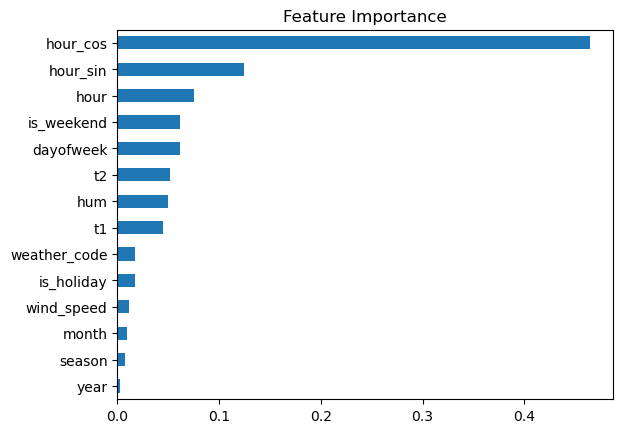

In [23]:
feat_importance = pd.Series(rf.feature_importances_, index=X_rf.columns)
feat_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

The above plot shows how important each feature was for the Random Forest model.

- The **`hour`** feature stands out as by far the most important; it contributes the most to predicting bike rental counts. This makes sense, as bike usage strongly depends on time of day (e.g. rush hours).
- Features like `dayofweek`, `t1`, `t2`, `hum`, and `is_weekend` have smaller but noticeable importance; they still help the model make better predictions.
- Features such as `season`, `month`, `year`, and `wind_speed` appear to have **very low importance** in this model.

**What to do with low-importance features?**

You might consider **removing them** to simplify the model. If doing so doesn't reduce performance much, it's often a good trade-off.  
A **simpler model is easier to interpret and faster to train**, which is especially valuable in real-world applications.

In [ ]:
# Drop the low-importance features
low_importance_features = feat_importance[feat_importance < 0.01].index
X_rf = X_rf.drop(columns=low_importance_features)
X_rf_time = X_rf_time.drop(columns=low_importance_features)

Dropping low-importance features led to a slight performance drop (RMSE ↑ by ~18, R² ↓ by ~0.009), but the model is still strong and now simpler.

In [ ]:
# Run the model with the dropped features
rf.fit(X_rf, y_rf) 
# Print the RMSE and r^2 round to 4
y_rf_pred = rf.predict(X_rf)
rmse = np.sqrt(mean_squared_error(y_rf, y_rf_pred))
r2 = r2_score(y_rf, y_rf_pred)
print(f"RMSE: {rmse:.4f}, R^2: {r2:.4f}")

RMSE: 84.6064, R^2: 0.9939


## Diagnose this Classification: Predicting Stroke from Health Data

This code trains a **classification model** to predict whether a person has had a **stroke**, using health-related features from the dataset.

- The target variable is `Stroke`, which is binary (0 = No Stroke, 1 = Stroke).
- We use `LogisticRegression` to build a simple baseline model.
- The data is split using **stratified sampling** to maintain the balance of classes in train and test sets.
- Finally, we evaluate the model using **accuracy** and a **threshold-based prediction adjustment**.
  - By lowering the threshold to 0.1, we're telling the model to be more aggressive in predicting strokes — increasing recall, even if it means more false positives.


**Familiarize yourself with the code, then run it.**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Load data
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

# Features and target
X = df.drop(columns=["Stroke"])
y = df["Stroke"]

# Train-test split (stratified to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling (optional but common)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with balanced class weights
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_proba = model.predict_proba(X_test_scaled)[:, 1]

y_pred = model.predict(X_test_scaled)

# Adjust threshold to favor recall
threshold = 0.1
y_pred_adjusted = (y_proba >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))

Accuracy: 0.893665247555976


### ???
The model is quite simple, yet it reports a **very high accuracy**.

But can we trust that number?

Try this:
- Copy the code into a new cell.
- Instead of using the trained model, **predict 0 for every case**, and check the accuracy of that.

In [33]:
# Predict 0 for every case and check accuracy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
X = df.drop(columns=["Stroke"])
y = df["Stroke"]

# Stratified train-test split to keep class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Predict 0 for every test case
y_pred_all_zero = [0] * len(y_test)

# Check accuracy rounded to 4 decimal places
print("Accuracy (predicting 0 for all):", round(accuracy_score(y_test, y_pred_all_zero), 4))

Accuracy (predicting 0 for all): 0.9594


#### The model's accuracy (89%) is actually **worse** than simply predicting "no stroke" every time (96%). You can observe how misleading accuracy can be with imbalanced data.

### Check the Class Balance

To understand why accuracy can be misleading, check how imbalanced the target variable is.

Use `value_counts()` to see how many stroke vs. no-stroke cases there are:

In [34]:
# Check class balance for the target variable 'Stroke'
import pandas as pd
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
print(df['Stroke'].value_counts())

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64


### Workaround for Imbalanced Data

When dealing with imbalanced datasets, one simple and effective strategy is to use:

```python
LogisticRegression(... , class_weight='balanced')


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Load data
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

# Features and target
X = df.drop(columns=["Stroke"])
y = df["Stroke"]

# Train-test split (stratified to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling (optional but common)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with balanced class weights
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_proba = model.predict_proba(X_test_scaled)[:, 1]

y_pred = model.predict(X_test_scaled)

# Adjust threshold to favor recall
threshold = 0.1
y_pred_adjusted = (y_proba >= threshold).astype(int)

print("Accuracy:", round(accuracy_score(y_test, y_pred_adjusted), 4))

Accuracy: 0.1776
